In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
n = 20
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
radius = 10
x = radius * np.cos(angles)
y = radius * np.sin(angles)
positions = np.vstack((x, y)).T

In [5]:
cost_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        cost_matrix[i, j] = np.linalg.norm(positions[i] - positions[j])

In [3]:
def simulated_annealing(cost, iterations=10000, T0=1.0, cooling='sqrt'):
    def total_cost(route):
        return sum(cost[route[i], route[i+1]] for i in range(n - 1)) + cost[route[-1], route[0]]

    def cooling_schedule(k):
        if cooling == 'sqrt':
            return T0 / np.sqrt(1 + k)
        elif cooling == 'log':
            return -np.log(1 + k + 1e-6)
        else:
            return T0 / (1 + k)

    current = np.random.permutation(n)
    best = current.copy()
    best_cost = total_cost(best)

    for k in range(1, iterations + 1):
        T = cooling_schedule(k)
        i, j = np.random.choice(n, 2, replace=False)
        candidate = current.copy()
        candidate[i], candidate[j] = candidate[j], candidate[i]
        delta = total_cost(candidate) - total_cost(current)
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            current = candidate
            if total_cost(current) < best_cost:
                best = current
                best_cost = total_cost(best)

    return best, best_cost

In [21]:
def simulated_annealing_b(cost, iterations=10000, T0=1.0, cooling='sqrt'):
    def total_cost(route):
        return sum(cost[route[i], route[i+1]] for i in range(n_b - 1)) + cost[route[-1], route[0]]

    def cooling_schedule(k):
        if cooling == 'sqrt':
            return T0 / np.sqrt(1 + k)
        elif cooling == 'log':
            return -np.log(1 + k + 1e-6)
        else:
            return T0 / (1 + k)

    current = np.random.permutation(n_b)
    best = current.copy()
    best_cost = total_cost(best)

    for k in range(1, iterations + 1):
        T = cooling_schedule(k)
        i, j = np.random.choice(n_b, 2, replace=False)
        candidate = current.copy()
        candidate[i], candidate[j] = candidate[j], candidate[i]
        delta = total_cost(candidate) - total_cost(current)
        if delta < 0 or np.random.rand() < np.exp(-delta / T):
            current = candidate
            if total_cost(current) < best_cost:
                best = current
                best_cost = total_cost(best)

    return best, best_cost

In [7]:
optimal_route, optimal_cost = simulated_annealing(cost_matrix)
route_coords = np.vstack([positions[optimal_route], positions[optimal_route[0]]])


In [25]:
optimal_cost

62.573786016092335

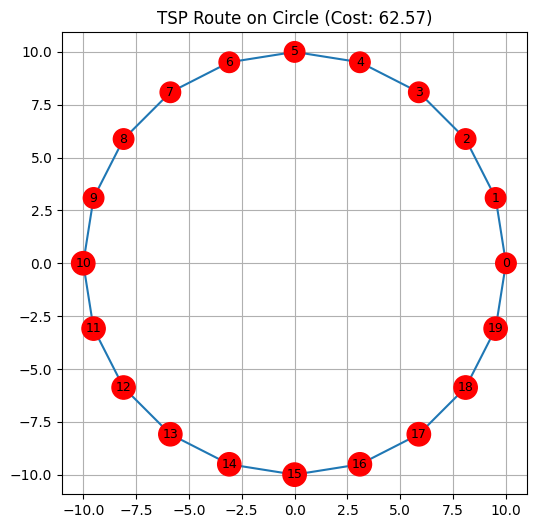

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')
for i, (x_, y_) in enumerate(positions):
    plt.text(x_, y_, str(i), fontsize=9, ha='center', va='center', bbox=dict(facecolor='red', edgecolor='red', boxstyle='circle'))
plt.title(f"TSP Route on Circle (Cost: {optimal_cost:.2f})")
plt.axis('equal')
plt.grid(True)
plt.show()

7b

In [18]:
cost_matrix_b = pd.read_excel("cost.csv.xlsx", header=None)


In [19]:
n_b = cost_matrix_b.shape[0]
cost_array_b = cost_matrix_b.values
station_labels_b = [str(i) for i in range(n_b)]

In [20]:
optimal_route_b, optimal_cost_b = simulated_annealing_b(cost_array_b)
optimal_station_order_b = [station_labels_b[i] for i in optimal_route_b]

In [22]:
result_df_b = pd.DataFrame({
    "Optimal Route": optimal_station_order_b + [optimal_station_order_b[0]],
    "Total Cost": [optimal_cost_b] * (n_b + 1)
})

In [23]:
result_df_b

,Optimal Route,Total Cost
0,3,1235
1,11,1235
2,5,1235
3,7,1235
4,4,1235
5,15,1235
6,9,1235
7,18,1235
8,14,1235
9,2,1235
